In [ ]:
!pip install -U -q PyDrive
!pip install ijson
!pip install numpy pandas matplotlib networkx
!pip install streamlit
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Replace with your shared drive ID
shared_drive_id = '1WcjMv_jvTMpqeI5N4IKa0g6TbeR-h3aY'

# List files in the shared drive
file_list = drive.ListFile({'q': f"'{shared_drive_id}' in parents and trashed=false"}).GetList()

for file in file_list:
    print(f"Title: {file['title']}, ID: {file['id']}")

Title: amplitude_export_2025.json.zip, ID: 1uSoQRTZq6KWbFS6aX63w3WNQaiQQf0B_
Title: amplitude_export_2024.zip, ID: 1oxCDgVNoHgWWYHC9z5eicliLr8O7-Odh


In [ ]:
# Example: Download a file from the shared drive
file_id = '1uSoQRTZq6KWbFS6aX63w3WNQaiQQf0B_'  # Replace with the file ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])  # Download the file
print(f"Downloaded: {downloaded['title']}")

Downloaded: amplitude_export_2025.json.zip


In [ ]:
# Example: Download a file from the shared drive
file_id = '1oxCDgVNoHgWWYHC9z5eicliLr8O7-Odh'  # Replace with the file ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])  # Download the file
print(f"Downloaded: {downloaded['title']}")

Downloaded: amplitude_export_2024.zip


In [ ]:
!unzip /content/amplitude_export_2024.zip -d /content/2024_json

Archive:  /content/amplitude_export_2024.zip
replace /content/2024_json/new_export/amplitude_export_chunk_3_anonymized.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/amplitude_export_2025.json.zip -d /content/2025_json

In [ ]:
!rm /content/amplitude_export_2024.zip
!rm /content/amplitude_export_2025.json.zip

In [ ]:
# import ijson
# import pandas as pd
# from pathlib import Path

# #file year
# year = 2025
# file_path = f"2025_json/new_amplitude_export_2025.json"

# #non-empty columns
# columns_keep = [
#     "$insert_id",
#     "amplitude_id",
#     "app",
#     "city",
#     "client_event_time",
#     "client_upload_time",
#     "country",
#     "data",
#     "data_type",
#     "device_family",
#     "device_id",
#     "device_type",
#     "dma",
#     "event_id",
#     "event_properties",
#     "event_time",
#     "event_type",
#     "language",
#     "library",
#     "os_name",
#     "os_version",
#     "platform",
#     "processed_time",
#     "region",
#     "server_received_time",
#     "server_upload_time",
#     "session_id",
#     "user_id",
#     "user_properties",
#     "uuid",
# ]
# path = Path(f"{year}_csv")
# if not path.exists():
#     path.mkdir(parents=True, exist_ok=True)
# #use ijson to read the json files efficiently in memory
# with open(file_path, "r") as f:
#     objects = ijson.items(f, "item") #creates a generator object

#     batch_size = 100000 #can be updated, currently saves per batches of 100,000
#     chunk = []
#     count = 0 #used to index batch file
#     for obj in objects:
#         chunk.append(obj)
#         if len(chunk) >= batch_size:
#             df = pd.DataFrame(chunk)
#             output_csv = f"{year}_csv/amplitude_export_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
#             df = df[columns_keep] #remove empty columns
#             df.to_csv(output_csv, index=False)
#             count += 1
#             chunk = []

#     if chunk: #process remaining data if any
#         output_csv = f"{year}_csv/amplitude_export_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
#         df = pd.DataFrame(chunk)
#         df = df[columns_keep]
#         df.to_csv(output_csv, index=False)

In [ ]:
import pandas as pd
import os
from pathlib import Path

# File year
year = 2024
folder_path = f"2024_json/new_export"

# Non-empty columns
columns_keep = [
    "client_event_time",
    "client_upload_time",
    "event_time",
    "event_type",
    "processed_time",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
]

# Create output directory
path = Path(f"{year}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)

# Process files in chunks
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    chunk_size = 100000  # Adjust based on your memory constraints
    chunk_count = 0

    # Read JSON file in chunks
    for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
        # Filter columns and clean data
        chunk = chunk[columns_keep]
        chunk = chunk.replace("EMPTY", pd.NA).dropna()

        # Save chunk to CSV
        output_csv = f"{year}_csv/{file_name.split('.')[0]}_chunk_{chunk_count}.csv"
        chunk.to_csv(output_csv, index=False)
        chunk_count += 1

        # Optionally, append to a master DataFrame (if needed)
        # mass2024df = pd.concat([mass2024df, chunk], ignore_index=True)

# If you need to combine all chunks into a single DataFrame, load them back in chunks
mass2024df = pd.concat(
    (pd.read_csv(f) for f in path.glob("*.csv")),
    ignore_index=True
)

# Analyze event counts
event_counts2024 = mass2024df['event_type'].value_counts()
threshold24 = 0.001 * len(mass2024df)
common_event_types2024 = event_counts2024[event_counts2024 > threshold24].index.tolist()
filtered_events2024 = event_counts2024[event_counts2024 > threshold24]

# Plot
filtered_events2024.plot(kind='bar', title='Class Distribution (Events > 0.1% of the time)')
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

ValueError: Expected object or value

In [ ]:
import ijson
import os
import pandas as pd
from pathlib import Path

#file year
year = 2024
folder_path = f"2024_json/new_export"

#non-empty columns
columns_keep = [
    "client_event_time",
    "client_upload_time",
    "event_time",
    "event_type",
    "processed_time",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
]
mass2024df = pd.DataFrame()
path = Path(f"{year}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
#use ijson to read the json files efficiently in memory
for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  with open(file_path, "r") as f:
      objects = ijson.items(f, "item") #creates a generator object

      batch_size = 100000 #can be updated, currently saves per batches of 100,000
      chunk = []
      count = 0 #used to index batch file
      for obj in objects:
          chunk.append(obj)
          if len(chunk) >= batch_size:
              df = pd.DataFrame(chunk)
              output_csv = f"{year}_csv/{file_name.split('.')[0]}_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
              df = df[columns_keep] #remove empty columns
              df = df.replace("EMPTY", pd.NA).dropna()
              mass2024df = pd.concat([mass2024df, df], ignore_index=True)
              df.to_csv(output_csv, index=False)
              count += 1
              chunk = []

      if chunk: #process remaining data if any
          output_csv = f"{year}_csv/{file_name.split('.')[0]}_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
          df = pd.DataFrame(chunk)
          df = df[columns_keep]
          df = df.replace("EMPTY", pd.NA).dropna()
          mass2024df = pd.concat([mass2024df, df], ignore_index=True)
          df.to_csv(output_csv, index=False)
event_counts2024 = mass2024df['event_type'].value_counts()
threshold24 = 0.001 * len(mass2024df)
common_event_types2024 = event_counts2024[event_counts2024 > threshold24].index.tolist()
filtered_events2024 = event_counts2024[event_counts2024 > threshold24]
filtered_events2024.plot(kind='bar', title='Class Distribution (Events > 0.1% of the time)')
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-b50ef4dfb2fc>", line None, in <cell line: 0>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
!rm -r /content/2024_json

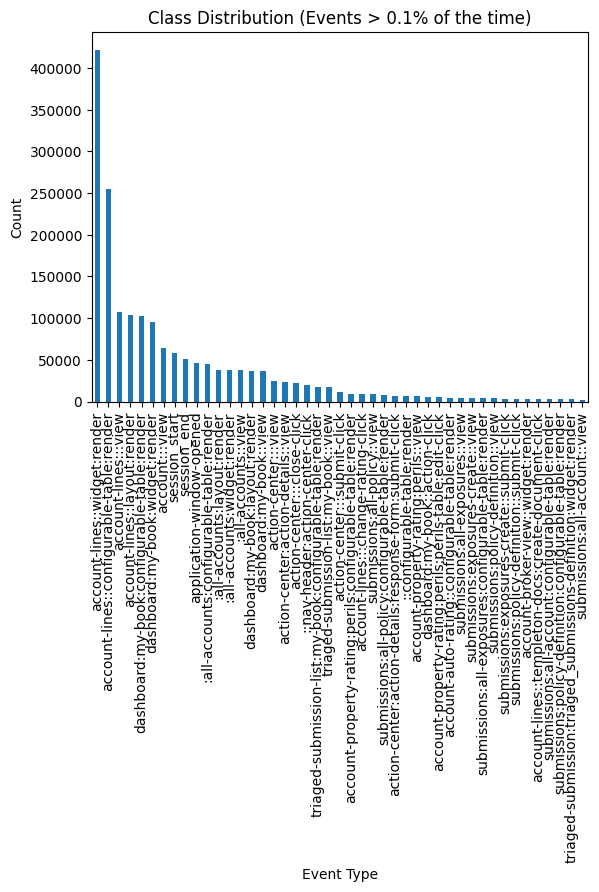

In [ ]:
import ijson
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#file year
year = 2025
file_path = f"2025_json/new_amplitude_export_2025.json"

#non-empty columns
columns_keep = [
    "client_event_time",
    "event_time",
    "event_type",
    "processed_time",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
]
mass2025df = pd.DataFrame()
path = Path(f"{year}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
#use ijson to read the json files efficiently in memory
with open(file_path, "r") as f:
    objects = ijson.items(f, "item") #creates a generator object

    batch_size = 100000 #can be updated, currently saves per batches of 100,000
    chunk = []
    count = 0 #used to index batch file
    for obj in objects:
        chunk.append(obj)
        if len(chunk) >= batch_size:
            df = pd.DataFrame(chunk)
            output_csv = f"{year}_csv/amplitude_export_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
            df = df[columns_keep] #remove empty columns
            df = df.replace("EMPTY", pd.NA).dropna()
            mass2025df = pd.concat([mass2025df, df], ignore_index=True)
            df.to_csv(output_csv, index=False)
            count += 1
            chunk = []

    if chunk: #process remaining data if any
        output_csv = f"{year}_csv/amplitude_export_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
        df = pd.DataFrame(chunk)
        df = df[columns_keep]
        df = df.replace("None", pd.NA).dropna()
        mass2025df = pd.concat([mass2025df, df], ignore_index=True)
        df.to_csv(output_csv, index=False)
event_counts = mass2025df['event_type'].value_counts()
threshold = 0.001 * len(mass2025df)
common_event_types = event_counts[event_counts > threshold].index.tolist()
filtered_events = event_counts[event_counts > threshold]
filtered_events.plot(kind='bar', title='Class Distribution (Events > 0.1% of the time)')
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

In [ ]:
!rm -r /content/2025_json

This model is for the 2025 preprocessed dataframe.

In [ ]:
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Assuming mass2025df is your cleaned DataFrame
# Sort the data by session_id and event_time
mass2025df = mass2025df.sort_values(by=['session_id', 'event_time'])

# Create the event_before column
mass2025df['event_before'] = mass2025df.groupby('session_id')['event_type'].shift()

na_event_before_rows = mass2025df[mass2025df['event_before'].isna()]

# Drop the first row of each session since it won't have an event_before
mass2025df = mass2025df.dropna(subset=['event_before'])

# Split the data into training and test sets (e.g., 80% training, 20% test)
train_df, test_df = train_test_split(mass2025df, test_size=0.2, random_state=42)

# Prepare the data for Markov chain training on the training set
transition_counts = defaultdict(lambda: defaultdict(int))

for _, row in train_df.iterrows():
    transition_counts[row['event_before']][row['event_type']] += 1

# Convert counts to probabilities
transition_probabilities = defaultdict(dict)

for event_before, transitions in transition_counts.items():
    total = sum(transitions.values())
    for event_type, count in transitions.items():
        transition_probabilities[event_before][event_type] = count / total

# Function to predict the next event given the current event
def predict_next_event(current_event):
    if current_event in transition_probabilities:
        next_event_probs = transition_probabilities[current_event]
        return max(next_event_probs, key=next_event_probs.get)
    else:
        return None

# Evaluate the model on the test set
correct_predictions = 0
total_predictions = 0

for _, row in test_df.iterrows():
    predicted_next_event = predict_next_event(row['event_before'])
    if predicted_next_event == row['event_type']:
        correct_predictions += 1
    total_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"Model Accuracy: {accuracy:.2f}")

# Example: Predict the next event given the current event
event_predictions = {"current_event": [], "next_event": []}

common_event_types = train_df['event_type'].unique()

for current_event in common_event_types:
    next_event = predict_next_event(current_event)
    event_predictions["current_event"].append(current_event)
    event_predictions["next_event"].append(next_event)

event_df = pd.DataFrame(event_predictions)

display(event_df)

Model Accuracy: 0.54


,current_event,next_event
0,account-lines::widget:render,account-lines::widget:render
1,account-lines::configurable-table:render,account-lines::widget:render
2,account-property-rating:pricing-detail:configu...,account-property-rating:pricing-detail:configu...
3,submissions:all-exposures::view,submissions:exposures-create::view
4,submissions:all-exposures:configurable-table:r...,submissions:all-exposures::view
...,...,...
216,account-property-rating:summary::view,account-property-rating:summary:configurable-t...
217,submissions:all-example_submission::view,submissions:example_submission-create::view
218,goals-and-rules:edit-goal:configurable-table:r...,goals-and-rules:edit-goal::save-click
219,submissions:all-example_submission:configurabl...,submissions:all-example_submission::view


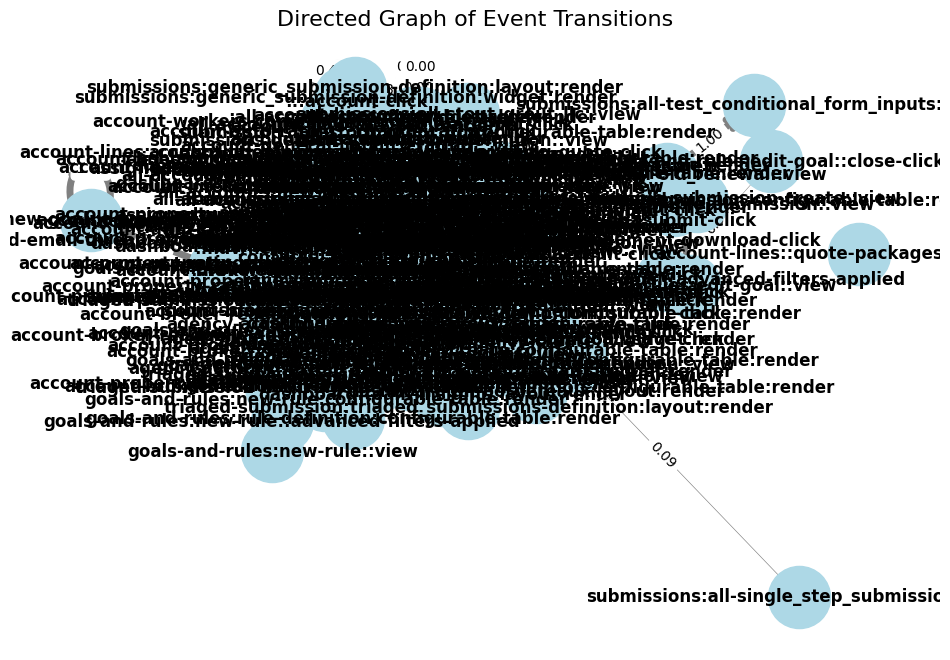

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on transition probabilities
for event_before, transitions in transition_probabilities.items():
    for event_after, probability in transitions.items():
        G.add_edge(event_before, event_after, weight=probability)

# Draw the graph using matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 5 for _, _, d in edges], edge_color='gray', arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add edge labels (transition probabilities)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Directed Graph of Event Transitions", fontsize=16)
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
from pyvis.network import Network

# Create a pyvis network
net = Network(notebook=True, directed=True, height="600px", width="100%")

# Add nodes and edges
for event_before, transitions in transition_probabilities.items():
    for event_after, probability in transitions.items():
        net.add_node(event_before)
        net.add_node(event_after)
        net.add_edge(event_before, event_after, value=probability * 10, title=f"{probability:.2f}")

# Show the graph
net.show("event_transitions.html")

ModuleNotFoundError: No module named 'pyvis'

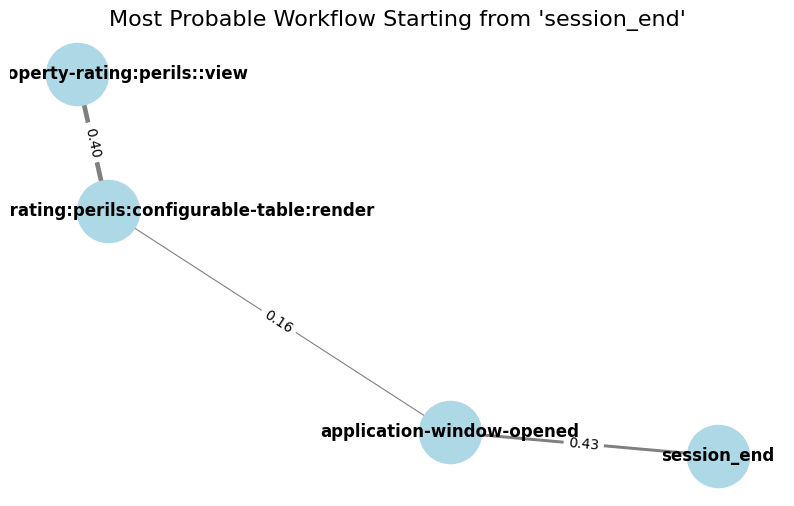

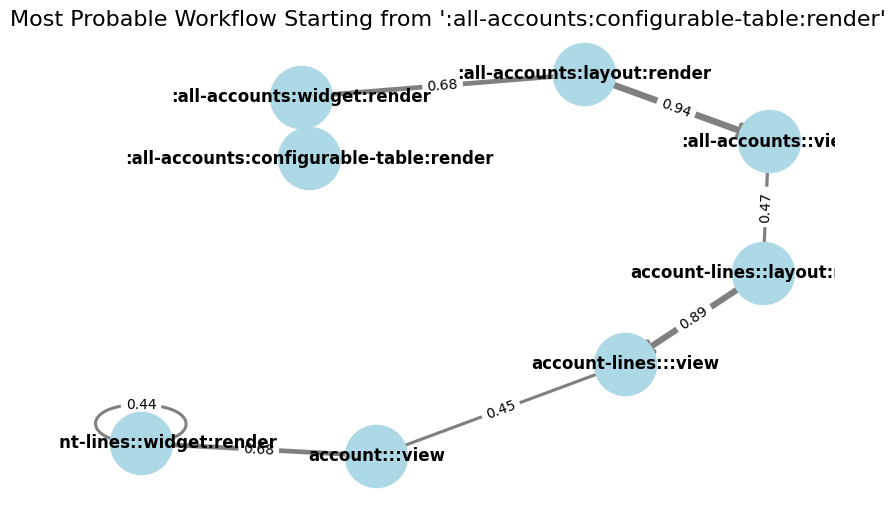

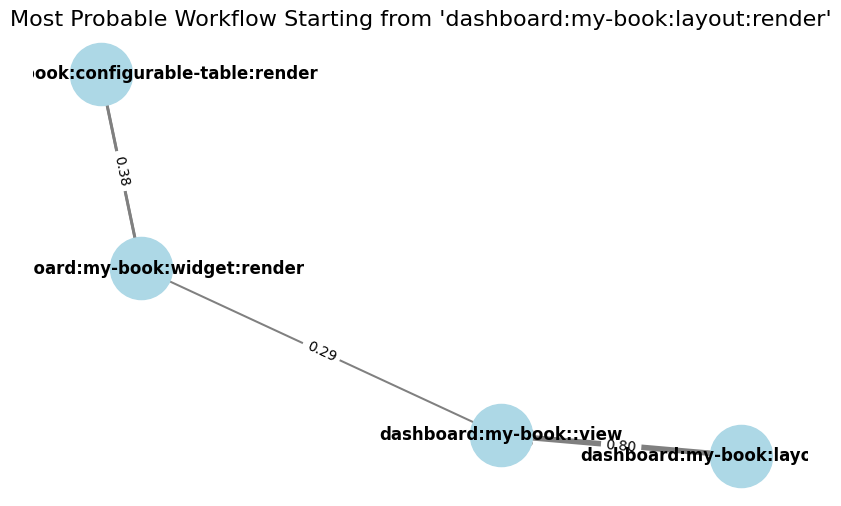

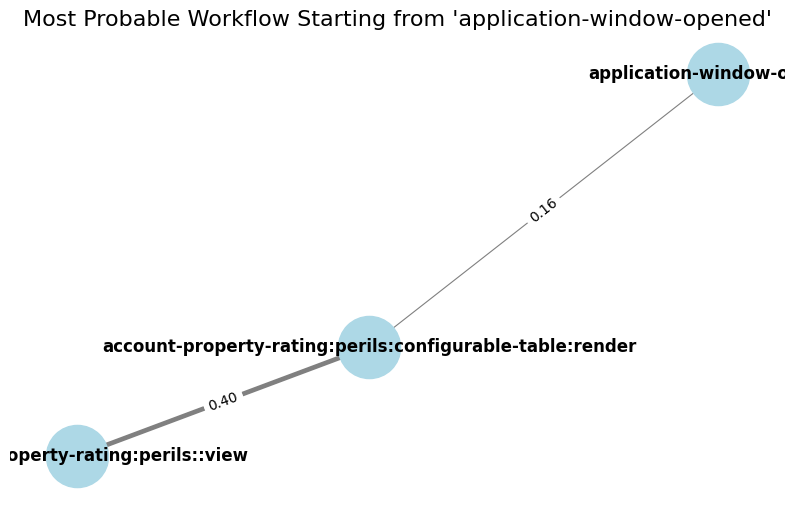

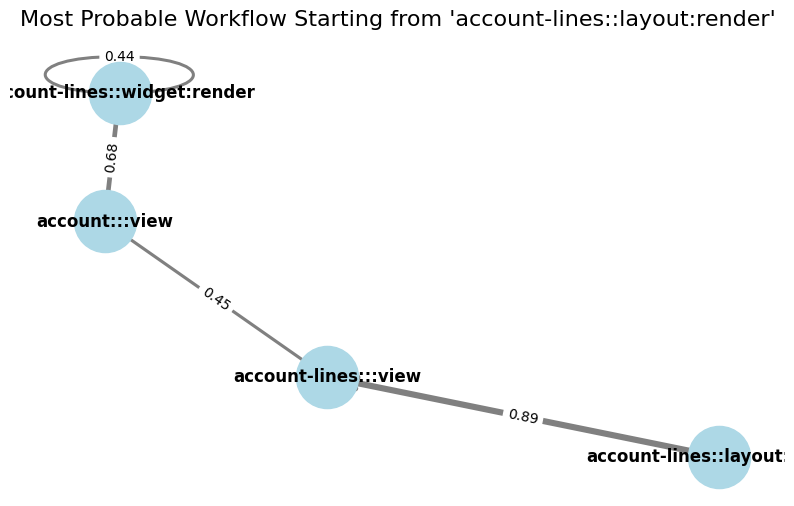

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Identify the 5 most common starting event types
# Group by session_id and get the first event_type for each session
first_events = na_event_before_rows.groupby('session_id')['event_type'].first().value_counts().head(5)

# Get the top 5 starting event types
top_starting_events = first_events.index.tolist()

# Step 2: Create and visualize the directed graphs for each starting event
for starting_event in top_starting_events:
    # Create a directed graph
    G = nx.DiGraph()

    current_event = starting_event
    G.add_node(current_event)  # Add the starting node

    # Traverse the most probable transitions
    while current_event in transition_probabilities:
        # Find the next event with the highest probability
        next_event = max(transition_probabilities[current_event], key=transition_probabilities[current_event].get)
        probability = transition_probabilities[current_event][next_event]

        if G.has_edge(current_event, next_event):
            break

        # Add the edge to the graph
        G.add_edge(current_event, next_event, weight=probability)

        # Move to the next event
        current_event = next_event

    # Draw the graph using matplotlib
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
    edges = G.edges(data=True)

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 5 for _, _, d in edges], edge_color='gray', arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add edge labels (transition probabilities)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title(f"Most Probable Workflow Starting from '{starting_event}'", fontsize=16)
    plt.axis('off')  # Turn off the axis
    plt.show()

In [ ]:
from pyvis.network import Network

for starting_event in top_starting_events:

    # Create a pyvis network
    net = Network(notebook=True, directed=True, height="600px", width="100%")
    current_event = starting_event

    while current_event in transition_probabilities:
        # Find the next event with the highest probability
        next_event = max(transition_probabilities[current_event], key=transition_probabilities[current_event].get)
        probability = transition_probabilities[current_event][next_event]

        if any(edge['from'] == current_event and edge['to'] == next_event for edge in net.get_edges()):
            break

        # Add the edge to the graph
        net.add_node(current_event)
        net.add_node(next_event)
        net.add_edge(current_event, next_event, value=probability * 10, title=f"{probability:.2f}")

        # Move to the next event
        current_event = next_event

        net.show(f"{starting_event}_event_transitions.html")

ModuleNotFoundError: No module named 'pyvis'